d:\Jupiter\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


******Instrument Connection******
TEKTRONIX,DPO4034,C020996,CF:91.1CT FV:v2.30 DPO4COMP:V1.00 DPO4EMBD:V1.00  Connected
DC Power Supply 6705 at serial COM11 is open
TENMA 72-13210 V3.21 SN:00018436 connected
******Instrument Initializing******
******Test flow start******
******Input configuration******
******Start PSUs test******
******Start unit test on channel 2******
******Set DC test mode for channel 2******


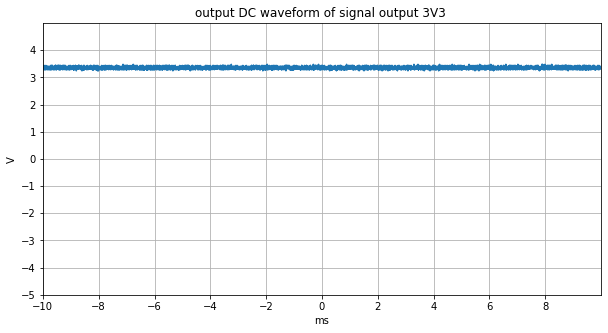

setting ac mode for ch2
sampling


<Figure size 432x288 with 0 Axes>

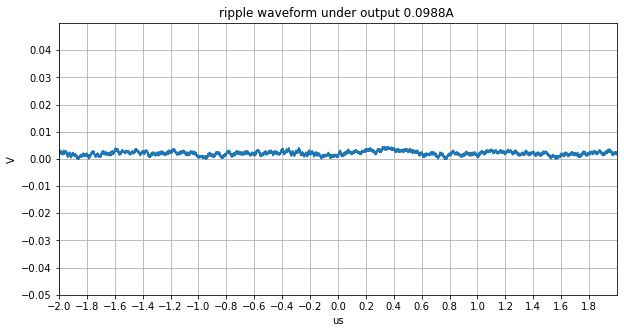

output 3.2918 0.0988
input 24.2606 0.058


<Figure size 432x288 with 0 Axes>

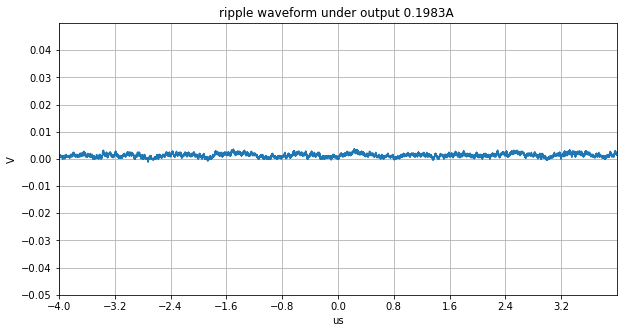

output 3.2791 0.1983
input 24.2664 0.072


<Figure size 432x288 with 0 Axes>

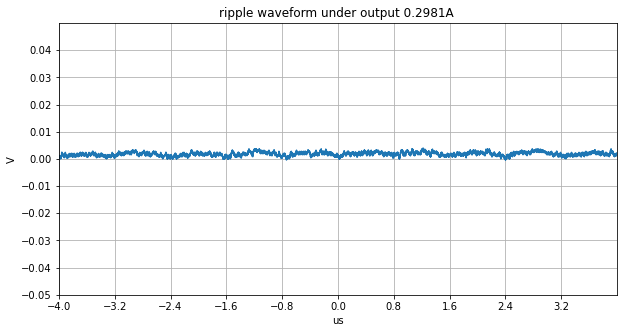

output 3.2678 0.2981
input 24.2564 0.086


<Figure size 432x288 with 0 Axes>

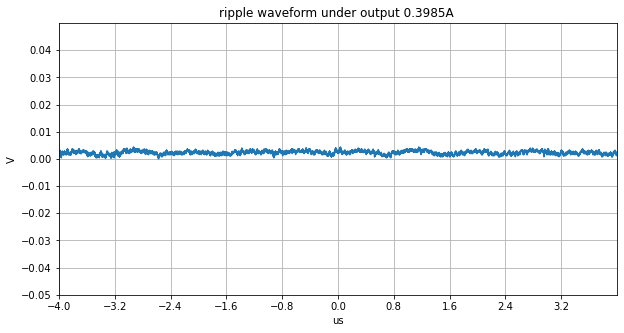

output 3.2573 0.3985
input 24.2545 0.101


<Figure size 432x288 with 0 Axes>

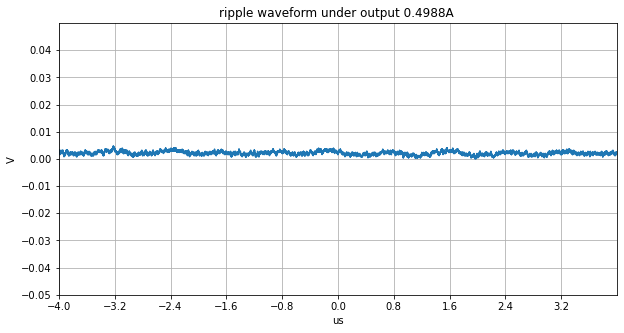

output 3.2166 0.4988
input 24.2576 0.117


<Figure size 432x288 with 0 Axes>

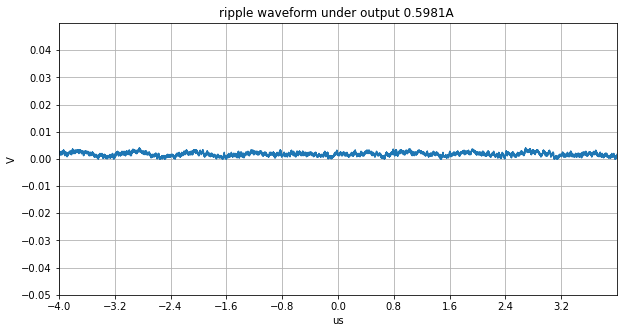

output 3.1992 0.5981
input 24.2636 0.132


<Figure size 432x288 with 0 Axes>

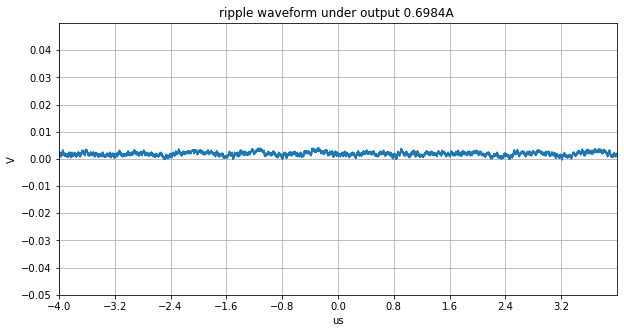

output 3.2085 0.6984
input 24.261 0.148


<Figure size 432x288 with 0 Axes>

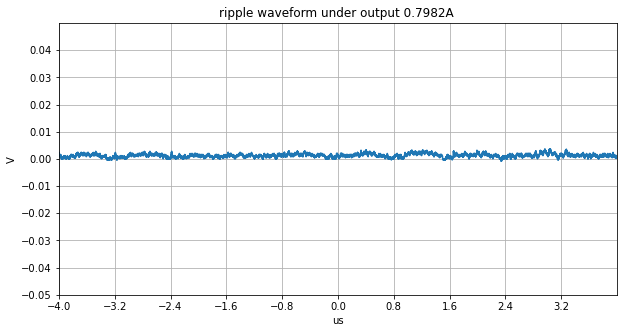

output 3.2022 0.7982
input 24.2583 0.164


<Figure size 432x288 with 0 Axes>

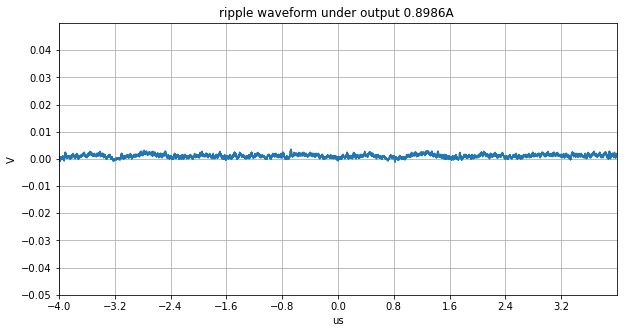

output 3.1043 0.8986
input 24.2555 0.181


<Figure size 432x288 with 0 Axes>

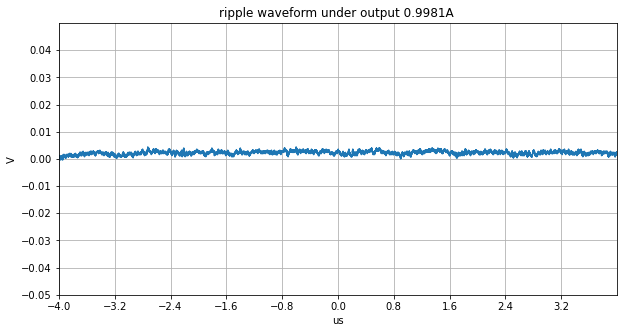

output 3.0862 0.9981
input 24.2564 0.197
******Start unit test on channel 3******
******Set DC test mode for channel 3******


<Figure size 432x288 with 0 Axes>

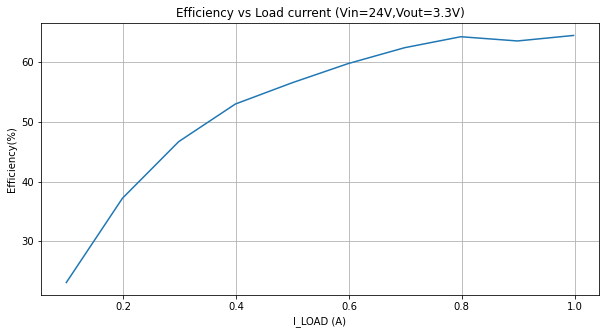

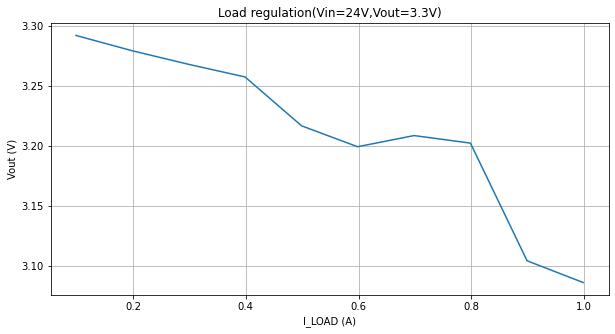

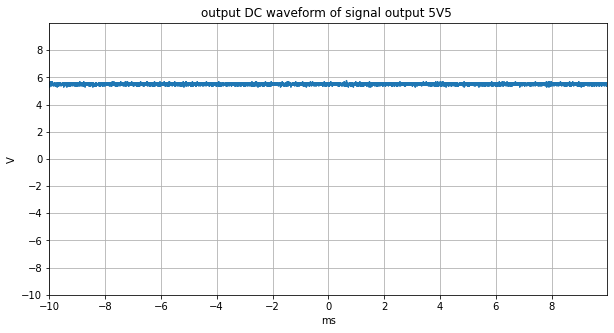

setting ac mode for ch3
sampling


<Figure size 432x288 with 0 Axes>

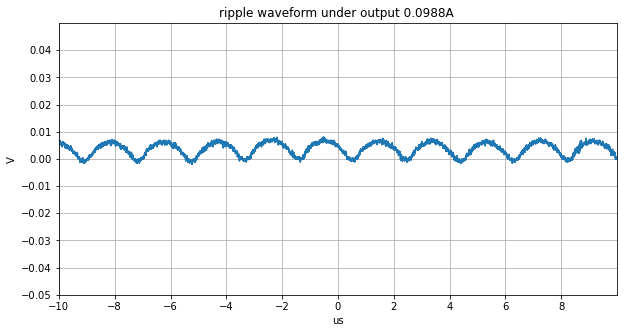

output 3.287 0.0988
input 24.264 0.058


<Figure size 432x288 with 0 Axes>

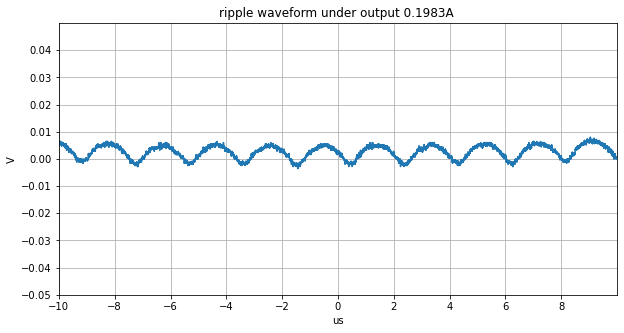

output 3.2677 0.1983
input 24.2607 0.072


<Figure size 432x288 with 0 Axes>

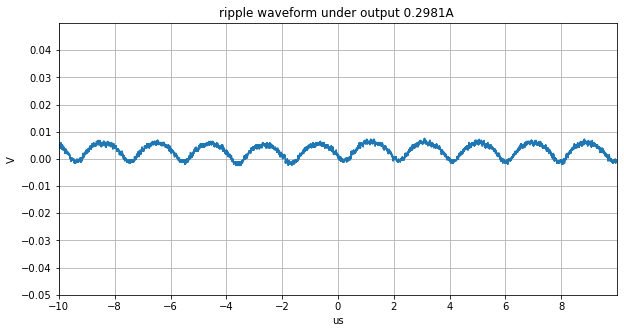

output 3.2493 0.2981
input 24.2604 0.086


<Figure size 432x288 with 0 Axes>

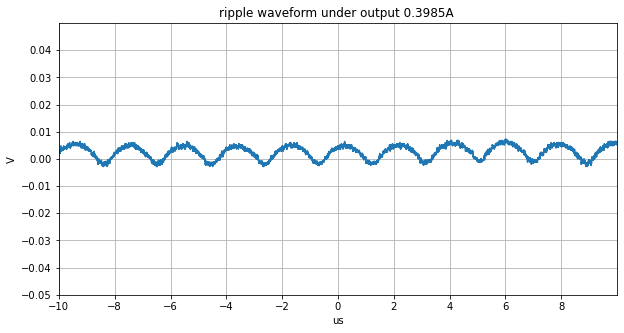

output 3.2305 0.3985
input 24.2543 0.101


<Figure size 432x288 with 0 Axes>

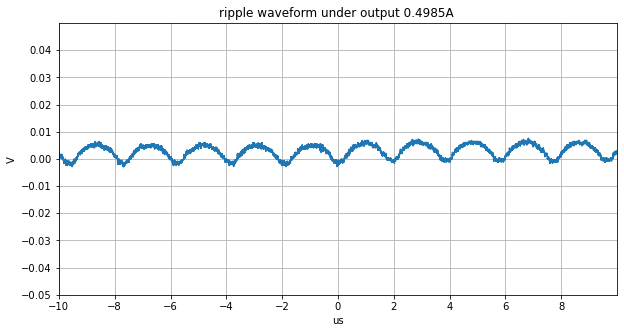

output 3.2115 0.4985
input 24.265 0.117


<Figure size 432x288 with 0 Axes>

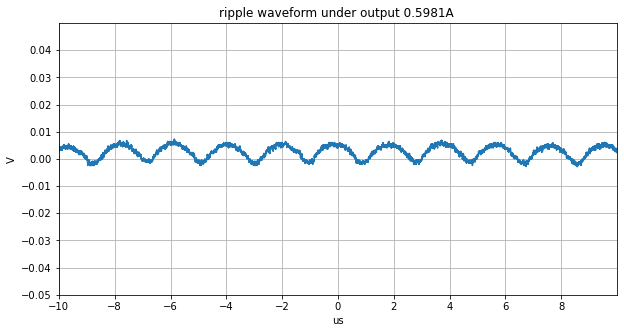

output 3.192 0.5981
input 24.256 0.132


<Figure size 432x288 with 0 Axes>

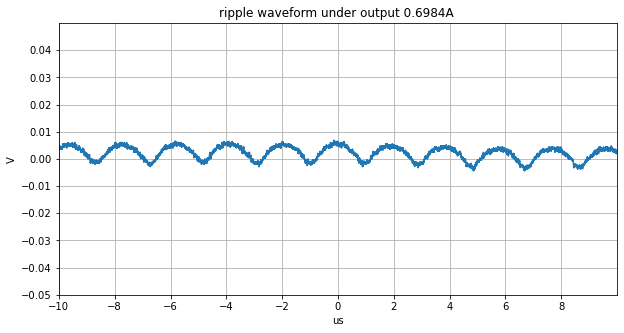

output 3.173 0.6984
input 24.2571 0.148


<Figure size 432x288 with 0 Axes>

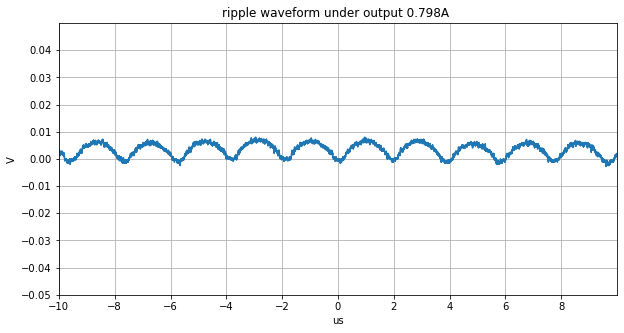

output 3.1547 0.798
input 24.2614 0.164


<Figure size 432x288 with 0 Axes>

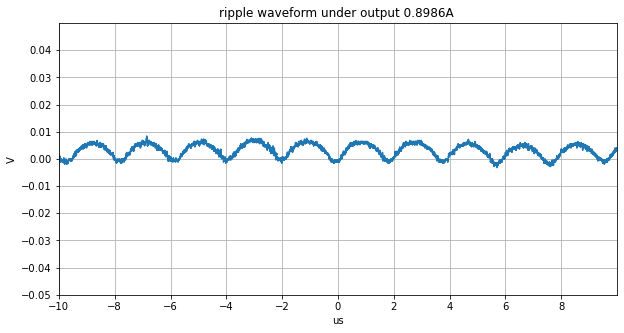

output 3.1374 0.8986
input 24.2667 0.181


<Figure size 432x288 with 0 Axes>

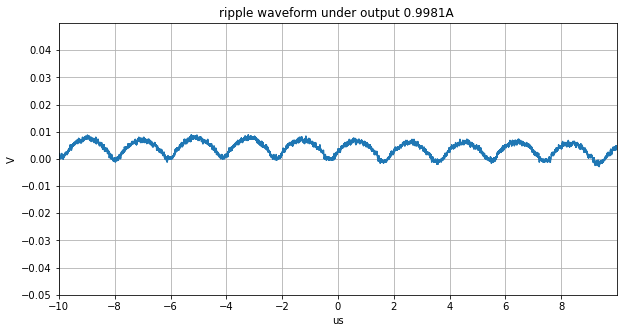

output 3.1196 0.9981
input 24.246 0.197
Serial close.
Test ended


<Figure size 432x288 with 0 Axes>

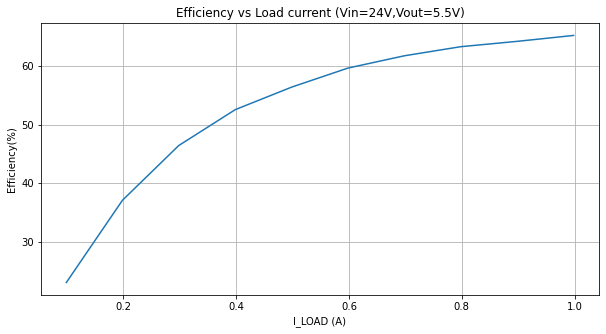

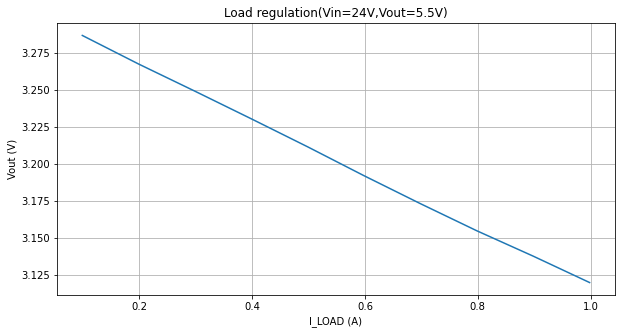

In [1]:
from PSUTester import *
p=PSUTester('fastTest.yaml')
#Test flow
p.test_flow()



In [ ]:
settings=p.config['DUT']
sequence_checks=[]
for i,settings in settings['output'].items():
    #p.run_unit_test(settings)
    input("manual change channel")
    if settings['sequence_check']==True:
        sequence_checks.append(settings['channel'])
if len(sequence_checks)!=0:
    p.power_sequence_check(sequence_checks)

In [ ]:
settings=p.config['DUT']
p.input_configuration(settings['input'])
sequence_checks=[]
for i,settings in settings['output'].items():
    #p.run_unit_test(settings)
    if settings['sequence_check']==True:
        sequence_checks.append(settings['channel'])
print(sequence_checks)

p.oscilloscope.write("ACQuire:STATE RUN")
p.oscilloscope.write("ACQuire:STOPAfter RUNSTOP")
p.power_supply.off()
p.load.off()

#Switch on channels
channel_in=p.config['DUT']['input']['channel']
in_scale=p.oscilloscope.nearest_v_scale(p.config['DUT']['input']['voltage'])
p.oscilloscope.channel_on(channel_in)
p.oscilloscope.set_y_scale(channel_in,in_scale)
for i in sequence_checks:
    p.oscilloscope.channel_on(i)
    p.oscilloscope.set_y_scale(i,in_scale)

In [ ]:

p.oscilloscope.set_t_scale(0.01)
p.oscilloscope.write("HORIZONTAL:MAIN:DELAY:TIME 2e-2") 
#Config oscilloscope to single mode rise trigger
p.oscilloscope.write(f"TRIGGER:A:EDGE:SOURCE CH{channel_in}")
p.oscilloscope.write(f"TRIGGER:A:LEVel {p.config['DUT']['input']['voltage']*0.1}")
p.oscilloscope.write("TRIGGER:A:EDGE:SLOPE RISE") 
p.oscilloscope.write("ACQuire:STOPAfter SEQUENCE")
p.oscilloscope.write("ACQuire:STATE RUN")
time.sleep(5)
#Power on sequence
p.power_supply.on()
time.sleep(2)
p.oscilloscope.get_waveform_all()
#p.power_supply.off()



In [ ]:
p.oscilloscope.write(f"TRIGGER:A:LEVel {p.config['DUT']['input']['voltage']*0.5}")
p.oscilloscope.write("TRIGGER:A:EDGE:SLOPE FALL") 
p.oscilloscope.write("ACQuire:STOPAfter SEQUENCE")
p.oscilloscope.write("ACQuire:STATE RUN")


In [ ]:
time.sleep(2)
p.power_supply.off()
time.sleep(2)
p.oscilloscope.get_waveform_all()
time.sleep(2)
p.oscilloscope.write("ACQuire:STATE RUN")
p.oscilloscope.write("ACQuire:STOPAfter RUNSTOP")

In [ ]:
p.oscilloscope.get_frequency(2)

In [ ]:
def nearest_scale(value):
    scales = [1, 2, 4]
    powers = [-9, -8, -7, -6, -5, -4, -3,-2,-1,0]  

    nearest_diff = float('inf')
    nearest_scale = None

    for scale in scales:
        for power in powers:
            scale_value = scale * 10 ** power
            diff = abs(value - scale_value)
            if diff < nearest_diff:
                nearest_diff = diff
                nearest_scale = scale_value

    return nearest_scale

# 测试示例
value = 1/1
nearest = nearest_scale(value)
print(f"Value: {value}, Nearest Scale: {nearest}")


In [ ]:
new_s=nearest_scale(1/p.oscilloscope.get_measurement(4))
print(new_s)
p.oscilloscope.set_t_scale(new_s)